### Custom datasets

In [1]:
#Importing PyTorch and setting up device agnostic code
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

torch.__version__

'2.0.0'

In [2]:
device

'cuda'

### GET DATA !!!!

Food 101 starts 101 different classes of food
we will start with 3 classes of food and %10 of all the images

It is generally a good idea to start small then increase the scale when necessary 

In [3]:
import requests 
import zipfile
from pathlib import Path

#Setup a path to the data folder
data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

#If the image folder doesn't exist , download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exists , skipping download")
else:
    print(f"{image_path} creating directory")
    image_path.mkdir(parents=True,exist_ok=True)

#Download pizza,steak and sushi
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading data")
    f.write(request.content)

#Unzip the data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    print("Unzipping data..")
    zip_ref.extractall(image_path)


data\pizza_steak_sushi directory already exists , skipping download
Unzipping data..


In [4]:
from helper_functions import walk_through_dir
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [5]:
#Setup train data and test data
train_dir=image_path/"train"
test_dir=image_path/"test"
train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

data\pizza_steak_sushi\test\sushi\2394442.jpg
sushi
Random image path is data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


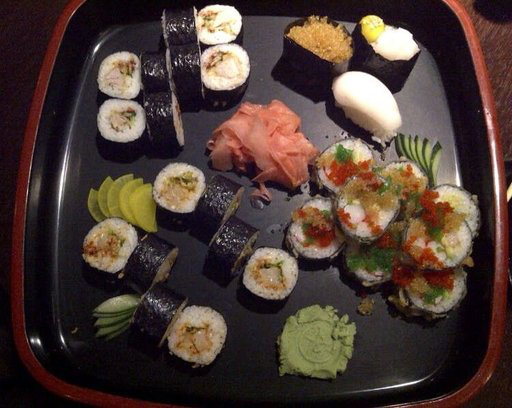

In [6]:
import random 
from PIL import Image

random.seed(42) 

#Get all the image paths
image_path_list=list(image_path.glob("*/*/*.jpg"))

random_image_path=random.choice(image_path_list)
print(random_image_path)
image_class=random_image_path.parent.stem
print(image_class)

img=Image.open(random_image_path)

print(f"Random image path is {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Text(0.5, 1.0, 'Image class sushi | Image shape (408, 512, 3) -> [Height,width,color channels]')

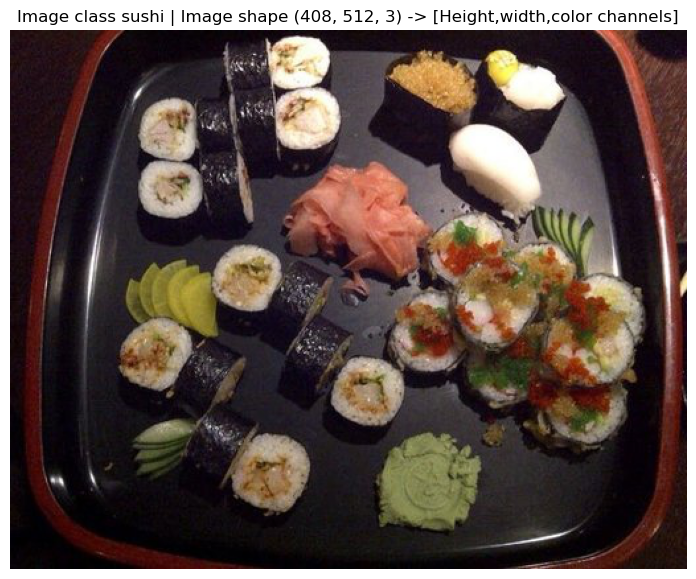

In [7]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array=np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.axis(False)
plt.title(f"Image class {image_class} | Image shape {img_as_array.shape} -> [Height,width,color channels]")


In [8]:
img_as_array

array([[[33, 13, 15],
        [30, 10, 12],
        [30, 10, 12],
        ...,
        [23, 14, 19],
        [21, 12, 17],
        [20, 11, 16]],

       [[35, 15, 17],
        [32, 12, 14],
        [31, 11, 13],
        ...,
        [21, 12, 17],
        [19, 10, 15],
        [19, 10, 15]],

       [[35, 15, 17],
        [32, 12, 14],
        [31, 11, 13],
        ...,
        [19, 10, 15],
        [18,  9, 14],
        [18,  9, 14]],

       ...,

       [[11,  6, 12],
        [11,  6, 12],
        [11,  6, 12],
        ...,
        [34, 18, 18],
        [33, 19, 18],
        [31, 17, 17]],

       [[ 8,  3,  9],
        [ 9,  4, 10],
        [ 9,  4, 10],
        ...,
        [36, 20, 20],
        [32, 16, 16],
        [27, 11, 11]],

       [[ 4,  0,  5],
        [ 5,  0,  6],
        [ 6,  1,  7],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [25,  9,  9]]], dtype=uint8)

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

#Transforming data with "torchvision.transforms"


In [10]:
#Transforms for image
data_transform =transforms.Compose([

    #Resize our images to 64x64 !!
    transforms.Resize(size=(64,64)),

    #Flip the images randomlyon the horizontal
    transforms.RandomHorizontalFlip(p=0.5),

    #Turn the image into a tensor !!!!!!!
    transforms.ToTensor()
])

In [11]:
data_transform(img).shape

torch.Size([3, 64, 64])

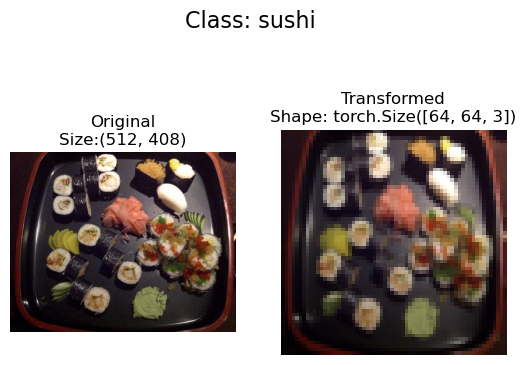

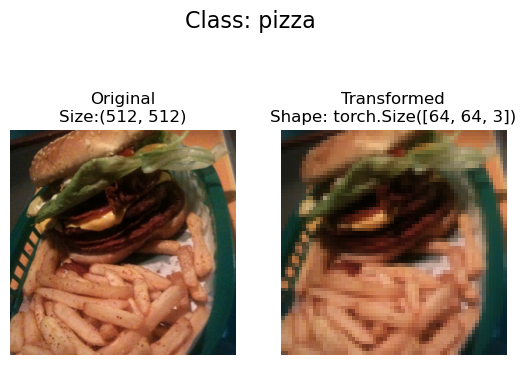

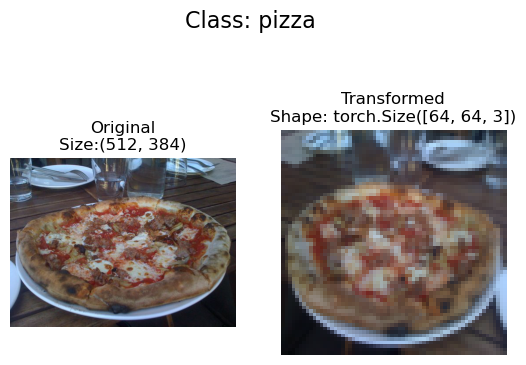

In [12]:
def plot_transformed_images(image_paths,transform,n=3,seed=None):
    """
    Selects random images from a path of images and loads/transforms them,
    then plots the original vs of the transformed version
    """
    if seed:
        random.seed(seed)
    random_image_paths=random.sample(image_paths,k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig,ax=plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize:{f.size}")
            ax[0].axis(False)

            #Transform and plot target image
            transformed_image=transform(f).permute(1,2,0) #Note we will need to change shape for matplotlib
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                            transform=data_transform,
                            n=3,seed=42)

## Loading image data using 'ImageFolder' 

In [13]:
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None)

test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

train_data,test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [14]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [15]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [16]:
len(train_data),len(test_data)

(225, 75)

In [17]:
img,label=train_data[0][0],train_data[0][1]
print(f"Image tenor:\n {img}")
print(f"Image shape:{img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tenor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Original shape: torch.Size([3, 64, 64]) -> [color_channels,height,width]
Image permute: torch.Size([64, 64, 3]) -> [height,width,color_channels]


Text(0.5, 1.0, 'pizza')

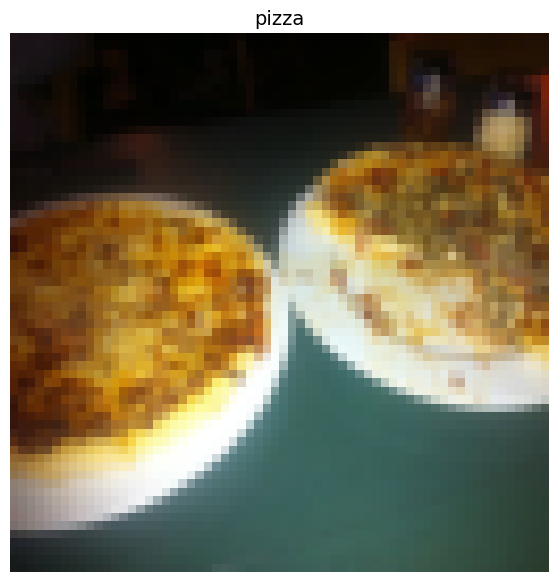

In [18]:
# Rearrange order of dimensions (color channels last)

img_permute=img.permute(1,2,0)
print(f"Original shape: {img.shape} -> [color_channels,height,width]")
print(f"Image permute: {img_permute.shape} -> [height,width,color_channels]")

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontsize=14)

In [19]:
#Turning our images into datasets

from torch.utils.data import DataLoader
import os 

BATCH_SIZE=1
NUM_WORKERS=os.cpu_count()

train_datalaoder=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKERS,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           num_workers=NUM_WORKERS,
                           shuffle=False)

train_datalaoder,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x11d9edd34f0>,
 <torch.utils.data.dataloader.DataLoader at 0x11d9edd3490>)

In [20]:
len(train_datalaoder),len(test_dataloader)

(225, 75)

In [21]:
img,label=next(iter(train_datalaoder))

#Batch size is 1 now
print(f"Image shape {img.shape} -> [batch_size,color_channels,height,width]")
print(f"Image shape: {label.shape}")


Image shape torch.Size([1, 3, 64, 64]) -> [batch_size,color_channels,height,width]
Image shape: torch.Size([1])


### Loading Image data with a custom Dataet

In [22]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List

In [23]:
train_data.class_to_idx,train_data.classes

({'pizza': 0, 'steak': 1, 'sushi': 2}, ['pizza', 'steak', 'sushi'])

In [25]:
#Creating a helper function to get class names from a directory
target_directory= train_dir
print(f"Target dir: {target_directory}")

#Get class names from target directory
class_names_found=sorted(entry.name for entry in list(os.scandir(target_directory)))
class_names_found

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [30]:
def find_classes(directory:str)-> Tuple[List[str],Dict[str,int]]:
    """Finds the class folder names in a target directory"""
    
    #Get the class names by scabbibg the target directory
    classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    #Raise error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes {directory}... please check file structure.")
    
    #Create a dictionary of index labels (number>strings)
    class_to_idx={class_name: i for i ,class_name in enumerate(classes)}

    return classes,class_to_idx

In [31]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})